In [8]:
import numpy as np
import pandas as pd
import os
import re
#https://www.nltk.org/
from sklearn.feature_extraction.text import CountVectorizer
#import tensorflow as tf
import ast
from matplotlib import pyplot as plt

#Decision trees for regression
#MSE for loss function

In [9]:
# from keybert import KeyBERT
# kw_model = KeyBERT()

In [10]:
#Extract the dataset we are interested in, synopsis, name, and rating.
df = pd.read_csv('DataSet/animes.csv')
df = df[['title','synopsis','score']]
df.dropna(inplace=True)
df = df[~df.title.duplicated(keep='first')]
df.head()

,title,synopsis,score
0,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,8.82
1,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,8.83
2,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,8.83
3,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...",9.23
4,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,8.83


In [11]:
#Method one for generating X vectors: hash.
from sklearn.feature_extraction.text import HashingVectorizer
X = df['synopsis'].to_numpy()
y = df['score'].to_numpy()
y = np.rint(y)
print(len(y))
vectorizer = HashingVectorizer(n_features=100, norm = None, alternate_sign = False)
hashed_X = vectorizer.fit_transform(X)
#print(hashed_X)
hashed_X.shape

15192


(15192, 100)

In [12]:
#Building training sets and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hashed_X, y, test_size = 0.2)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(max_depth=100)
model.fit(X_train, y_train)
pred = model.predict(X_test)

score = accuracy_score(y_test, pred)
print("Score: " + str(score))

Score: 0.34320500164527806


Accuracy of about 35%, which is better than guessing randomly (10%), but not very good for practical predictions.

Pros of this method: Easy to implement

Cons: Not interpretable, I have no idea what type of synopsis correspond to the predictions made.

In [14]:
import nltk

#https://www.nltk.org/book/ch06.html
#https://www.datacamp.com/tutorial/text-analytics-beginners-nltk#sentiment-analysis

In [15]:
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['synopsis'])

In [16]:
#https://splunktool.com/unknown-label-type-error-when-sklearn-naive-bayes-used-with-floating-point-numbers
score_int = df['score'].to_numpy()
score_int = np.rint(score_int)
X_train, X_test, y_train, y_test = train_test_split(text_counts, score_int, test_size=0.3, random_state=1)

In [17]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predicted))


Accuracy: 0.48244844229925404


The accuracy is slightly higher with nltk implemented at around 47%, but there are still improvements to be made. 

In [18]:
from sklearn.tree import DecisionTreeRegressor

#Using old tokenizer, subject to change.
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
X= cv.fit_transform(df['synopsis'])

#Now that we are using decision tree regression, we can use the scores as floats.
y = df['score'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

tree_reg = DecisionTreeRegressor()

tree_reg.fit(X_train, y_train)

y_test_pred = tree_reg.predict(X_test)

y_train_pred = tree_reg.predict(X_train)

In [19]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_test_pred))
print(mean_squared_error(y_train, y_train_pred))


1.0155236676371826
0.0027221966491129085


It seems this initial run on regression tree overfit the data, it has a really low mean squared error on the training data, but seems to be relatively high on the testing data

In [13]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
#with stop words & max_df 0.7 & ngram_range = (1,2)
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english', max_df = 0.7, ngram_range = (1,2), tokenizer = token.tokenize)
X= cv.fit_transform(df['synopsis'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

tree_reg.fit(X_train, y_train)

y_test_pred = tree_reg.predict(X_test)

y_train_pred = tree_reg.predict(X_train)

print(mean_squared_error(y_test, y_test_pred))
print(mean_squared_error(y_train, y_train_pred))

0.9775230180832845
0.002713765829728543


In [14]:
#without stop words & ngram_range = (1,1)
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True, ngram_range = (1,1), tokenizer = token.tokenize)
X= cv.fit_transform(df['synopsis'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

tree_reg.fit(X_train, y_train)

y_test_pred = tree_reg.predict(X_test)

y_train_pred = tree_reg.predict(X_train)

print(mean_squared_error(y_test, y_test_pred))
print(mean_squared_error(y_train, y_train_pred))

1.0332234147804837
0.002550271377970033


In [15]:
#without stop words & ngram_range = (1,2)
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True, ngram_range = (1,2), tokenizer = token.tokenize)
X= cv.fit_transform(df['synopsis'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

tree_reg.fit(X_train, y_train)

y_test_pred = tree_reg.predict(X_test)

y_train_pred = tree_reg.predict(X_train)

print(mean_squared_error(y_test, y_test_pred))
print(mean_squared_error(y_train, y_train_pred))

1.0325918269175687
0.002550271377970033


The removal of stop words helps get a better score. Changing the ngram to unigrams and bigrams also helps.

In [16]:
#with stop words & max_df 0.7 & ngram_range = (1,2)
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english', max_df = 0.7, ngram_range = (1,2), tokenizer = token.tokenize)
X= cv.fit_transform(df['synopsis'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

tree_reg.fit(X_train, y_train)

y_test_pred = tree_reg.predict(X_test)

y_train_pred = tree_reg.predict(X_train)

print(mean_squared_error(y_test, y_test_pred))
print(mean_squared_error(y_train, y_train_pred))

0.977287710809139
0.002713765829728543


In [17]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
#with stop words & nmax_df 0.7 & gram_range = (1,2)
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english', max_df = 0.7, ngram_range = (1,3), tokenizer = token.tokenize)
X= cv.fit_transform(df['synopsis'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

tree_reg.fit(X_train, y_train)

y_test_pred = tree_reg.predict(X_test)

y_train_pred = tree_reg.predict(X_train)

print(mean_squared_error(y_test, y_test_pred))
print(mean_squared_error(y_train, y_train_pred))

0.9569137053974088
0.002713765829728543


ngram of (1,3) has a slightly better score. However we will just stick with (1,2) since (1,3) takes too long to process

In [24]:
#with stop words & max_df 0.7 & ngram_range = (1,2)
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english', max_df = 0.7, ngram_range = (1,2), tokenizer = token.tokenize)
X= cv.fit_transform(df['synopsis'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

tree_reg = DecisionTreeRegressor(max_depth=30)
tree_reg.fit(X_train, y_train)

y_test_pred = tree_reg.predict(X_test)

y_train_pred = tree_reg.predict(X_train)

print(mean_squared_error(y_test, y_test_pred))
print(mean_squared_error(y_train, y_train_pred))

0.8010015689187929
0.387055418677104


Limiting Tree depth significantly improves accuracy on the test data, let's try to find optimal depth.

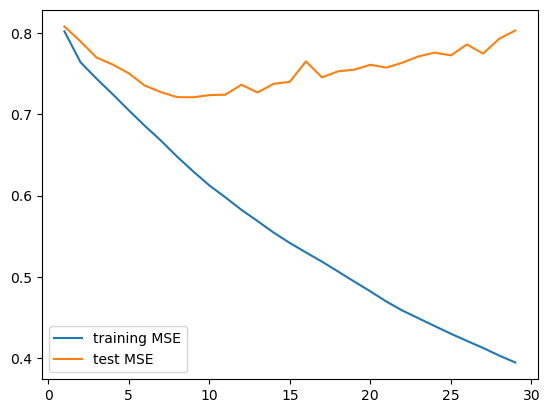

In [26]:
depth = []
training_MSE= []
test_MSE = []
for i in range(30):
    if(i == 0):
        pass
    else:
        #with stop words & max_df 0.7 & ngram_range = (1,2)
        token = RegexpTokenizer(r'[a-zA-Z0-9]+')
        cv = CountVectorizer(lowercase=True,stop_words='english', max_df = 0.7, ngram_range = (1,2), tokenizer = token.tokenize)
        X= cv.fit_transform(df['synopsis'])
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

        tree_reg = DecisionTreeRegressor(max_depth=i)
        tree_reg.fit(X_train, y_train)

        y_test_pred = tree_reg.predict(X_test)

        y_train_pred = tree_reg.predict(X_train)
        
        training_MSE.append(mean_squared_error(y_train, y_train_pred))
        test_MSE.append(mean_squared_error(y_test, y_test_pred))
        depth.append(i)
plt.plot(depth, training_MSE, label = "training MSE")
plt.plot(depth, test_MSE, label = "test MSE")
plt.legend()
plt.show()